# 1. Import Prerequisite, Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Preparation

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


# 3. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [4]:
df['Species'].unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

# 4. Model Development

In [5]:
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #model evaluation

In [6]:
X = df.drop('Species', axis=1)
Y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 30
number of training samples: 70


In [7]:
accuracies = {}

## Logistic Regression

In [8]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

acc = LR.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 96.67%


In [9]:
accuracies

{'Logistic Regression': 96.66666666666667}

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

acc = DTC.score(X_test,y_test)*100

accuracies['Decision Tree Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 90.00%


{'Logistic Regression': 96.66666666666667, 'Decision Tree Classifier': 90.0}

## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

acc = RF.score(X_test,y_test)*100

accuracies['Random Forest Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 93.33%


{'Logistic Regression': 96.66666666666667,
 'Decision Tree Classifier': 90.0,
 'Random Forest Classifier': 93.33333333333333}

## K-Nearest Neighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

acc = KNN.score(X_test,y_test)*100

accuracies['K-Nearest Neighbors'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

NameError: name 'X_train' is not defined

# 5. Model Evaluation

In [13]:
accuracies

{'Logistic Regression': 96.66666666666667,
 'Decision Tree Classifier': 90.0,
 'Random Forest Classifier': 93.33333333333333,
 'K-Nearest Neighbors': 93.33333333333333}

<BarContainer object of 4 artists>


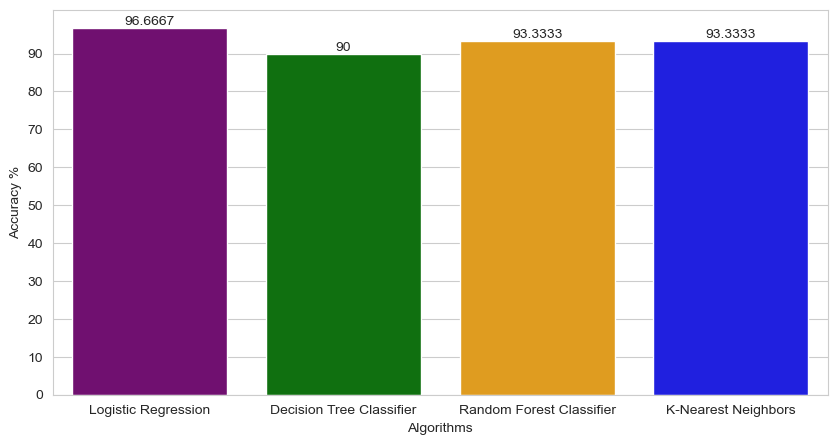

In [24]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    print(i)
    ax.bar_label(i, ) #function2

plt.show()

In [26]:
for i in ax.containers: #function1
    print(i,)

<BarContainer object of 4 artists>


In [31]:
y_head_LR = LR.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_LR)

In [32]:
cm_lr

array([[14,  1],
       [ 0, 15]], dtype=int64)

<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

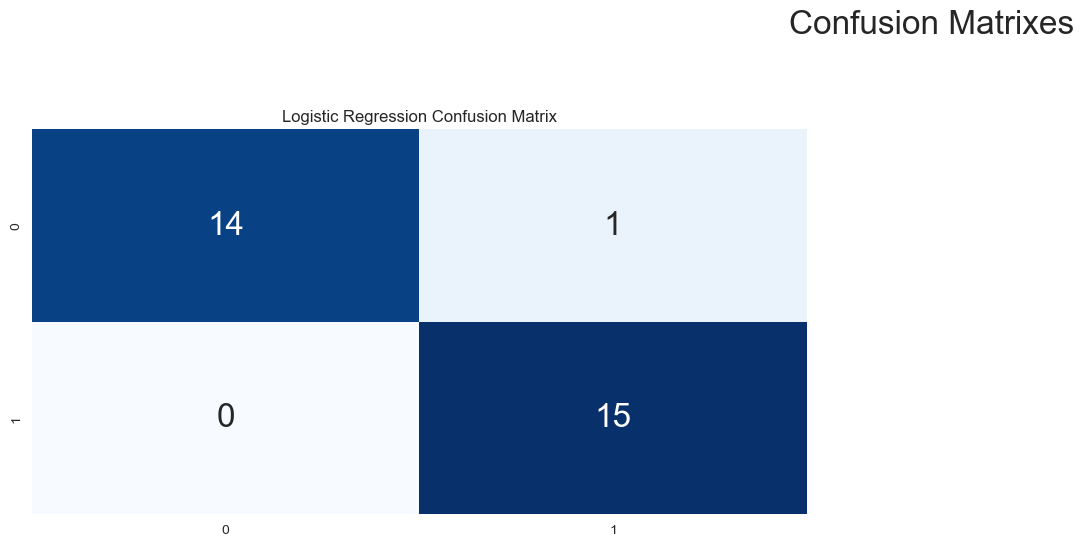

In [33]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [40]:
model = [LR, DTC, RF, KNN]
for j in model:
    prediction = j.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm_lr = confusion_matrix(y_test,prediction)
    print("")
    print("Model:",j)
    acc = j.score(X_test,y_test)*100
    accuracies['K-Nearest Neighbors'] = acc
    print("Test Accuracy {:.2f}%".format(acc))
    print(cm_lr)


Model: LogisticRegression()
Test Accuracy 96.67%
[[14  1]
 [ 0 15]]

Model: DecisionTreeClassifier()
Test Accuracy 90.00%
[[12  3]
 [ 0 15]]

Model: RandomForestClassifier()
Test Accuracy 93.33%
[[13  2]
 [ 0 15]]

Model: KNeighborsClassifier()
Test Accuracy 93.33%
[[13  2]
 [ 0 15]]


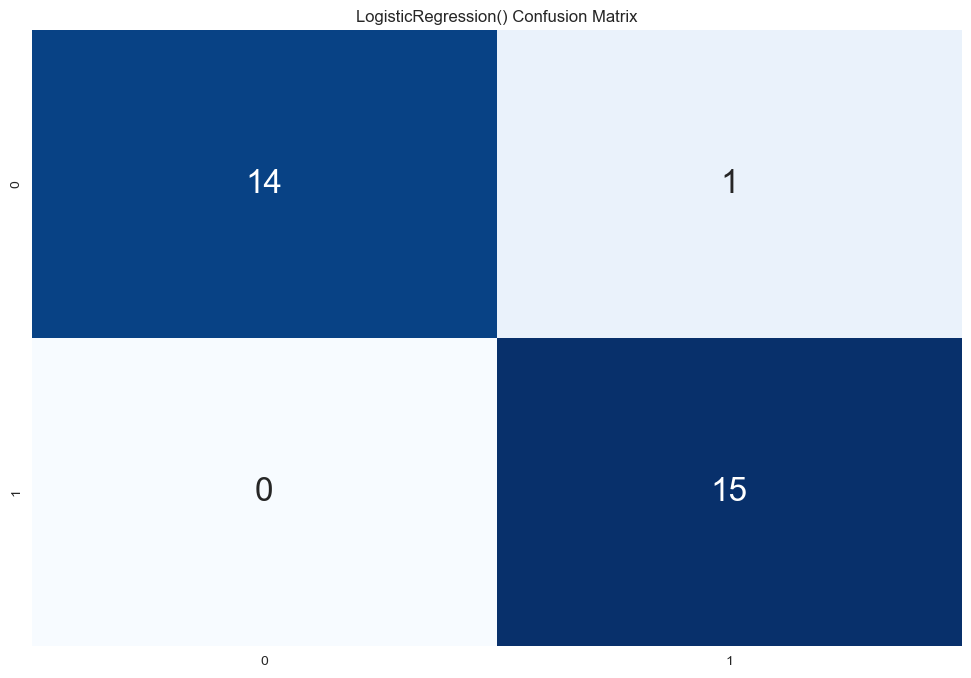

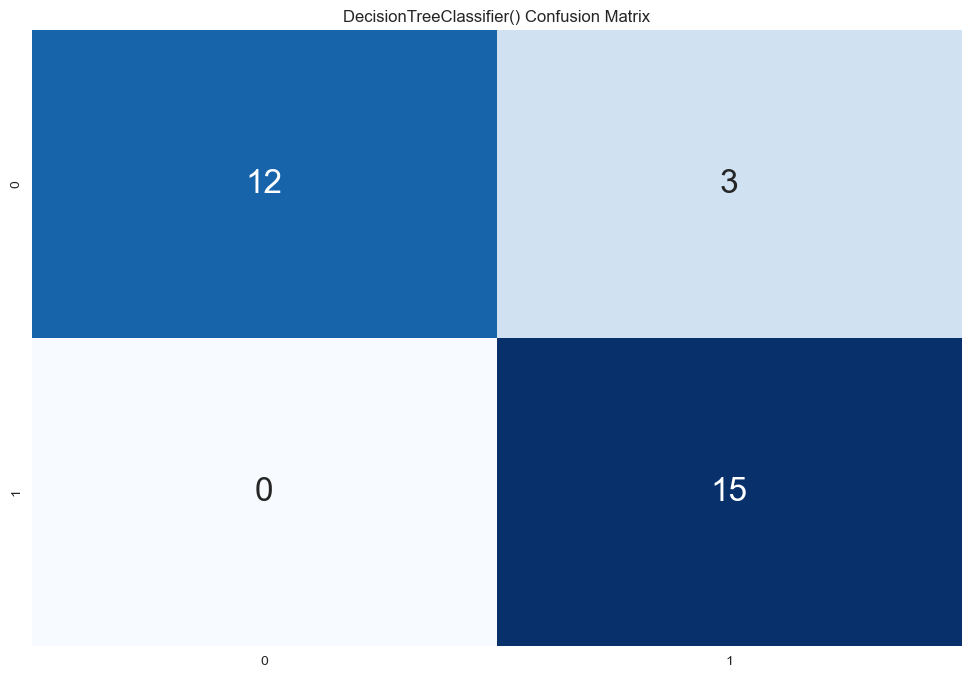

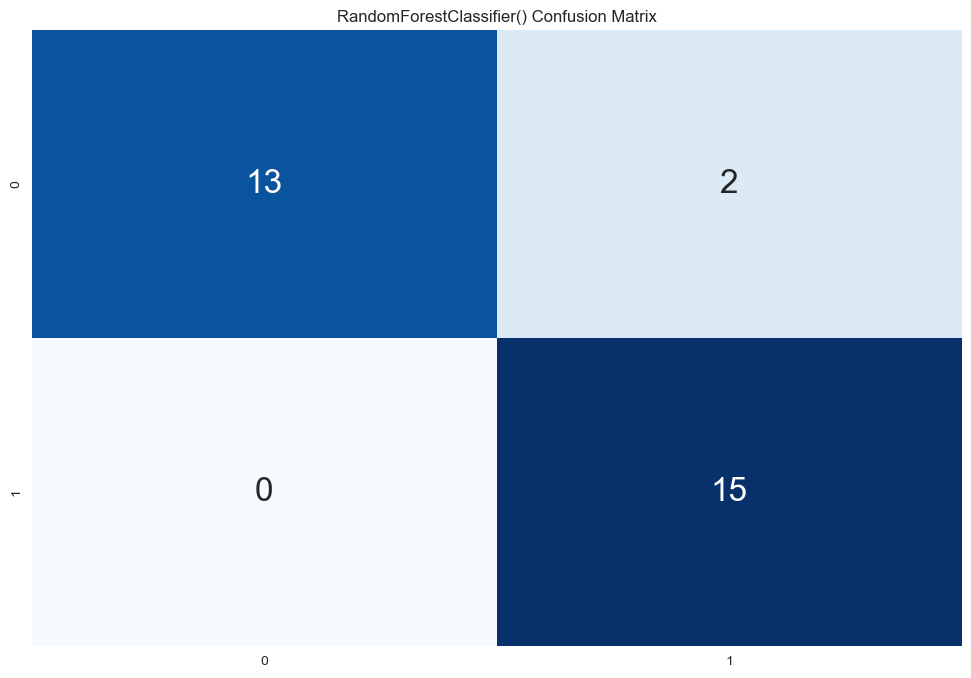

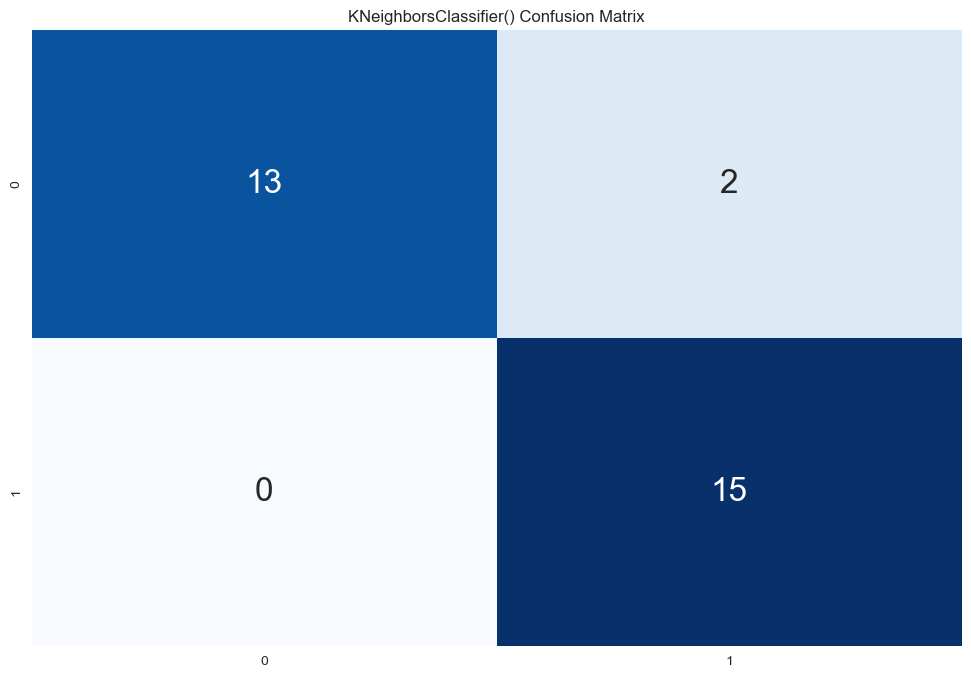

In [50]:
for j in model:
    y_head = j.predict(X_test)
    cm = confusion_matrix(y_test, y_head)
    
    plt.figure(figsize=(12, 8))
    plt.title(f"{j} Confusion Matrix")
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
    plt.show()